In [56]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import warnings
warnings.filterwarnings('ignore')

# from sklearn.model_selection import train_test_split
# from sklearn.linear_model import LogisticRegression
# from sklearn.metrics import accuracy_score
# from sklearn.svm import SVC
# from sklearn.preprocessing import StandardScaler
# from sklearn.preprocessing import MinMaxScaler
# from sklearn.preprocessing import RobustScaler
# from sklearn.neighbors import KNeighborsClassifier
from matplotlib import pyplot as plt
import seaborn as sns
# from sklearn.tree import DecisionTreeClassifier
# from sklearn.ensemble import RandomForestClassifier
# from sklearn.model_selection import GridSearchCV
# from xgboost import XGBClassifier

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

# import os
# for dirname, _, filenames in os.walk('/kaggle/input'):
#     for filename in filenames:
#         print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

## Заготовка проекта!

# Классификация типов леса
### (Forest types сlassification based on information about the area)

Область исследования включает в себя четыре зоны дикой природы, расположенные в Национальном лесу Рузвельта в Северном Колорадо. Каждое наблюдение представляет собой участок размером 30 м х 30 м. Существует семь типов:

1 - Spruce/Fir (Ель/Пихта)
2 - Lodgepole Pine (Разновидность сосны)
3 - Ponderosa Pine (разновидность сосны)
4 - Cottonwood/Willow (Тополь / Ива)
5 - Aspen (Осина)
6 - Douglas-fir
7 - Krummholz

Обучающий набор (15120 наблюдений) содержит как признаки, так и тип леса (Cover_Type).

Описание полей данных

Elevation - высота в метрах
Aspect - аспект в градусах Азимута
Slope - Крутизна склона в градусах
Horizontal_Distance_To_Hydrology - горизонтальное растояние до ближайшей поверхности водных объектов
Vertical_Distance_To_Hydrology - вертикальное растояние до ближайшей поверхности водных объектов
Horizontal_Distance_To_Roadways - горизонтального растояние до ближайшей проезжей части
Hillshade_9am (индекс от 0 до 255) - индекс Hillshade (освещённость) в 9 утра, день летнего солнцестояния
Hillshade_Noon (индекс от 0 до 255) - индекс Hillshade (освещённость) в полдень, день летнего солнцестояния
Hillshade_3pm (индекс от 0 до 255) - индекс Hillshade (освещённость) в 3 часа дня, День летнего солнцестояния
Horizontal_Distance_To_Fire_Points - горизонтального растояние до ближайшей точеки зажигания лесного пожара
Wilderness_Area (4 двоичных столбца, 0 = отсутствие или 1 = присутствие) - признак одной из четырёх территорий
Soil_Type (40 двоичных столбцов, 0 = отсутствие или 1 = наличие) - обозначение типа почвы
Cover_Type (7 типов, целые числа от 1 до 7) - обозначение типа лесного покрова

## Разделение данных по признаку территории (разные леса)

In [72]:
data = pd.read_csv("train.csv", sep=",")
X = data.copy()
# X = data.drop(["Cover_Type"], axis=1)
# y = pd.DataFrame(data, columns=["Cover_Type"])
# test = pd.read_csv("/kaggle/input/learn-together/test.csv", sep=",")

In [73]:
print(X.loc[X['Wilderness_Area1'] == True, 'Wilderness_Area1'].count())
print(X.loc[X['Wilderness_Area2'] == True, 'Wilderness_Area2'].count())
print(X.loc[X['Wilderness_Area3'] == True, 'Wilderness_Area3'].count())
print(X.loc[X['Wilderness_Area4'] == True, 'Wilderness_Area4'].count())

3597
499
6349
4675


In [74]:
data.loc[data['Cover_Type'] == 3, 'Cover_Type'].count()

2160

In [75]:
data.groupby(['Cover_Type'])['Cover_Type'].count()

Cover_Type
1    2160
2    2160
3    2160
4    2160
5    2160
6    2160
7    2160
Name: Cover_Type, dtype: int64

In [76]:
WA1ind = data.loc[data['Wilderness_Area1'] == 1].index
WA2ind = data.loc[data['Wilderness_Area2'] == 1].index
WA3ind = data.loc[data['Wilderness_Area3'] == 1].index
WA4ind = data.loc[data['Wilderness_Area4'] == 1].index

In [77]:
wa1 = data.loc[WA1ind].groupby(['Cover_Type'])['Cover_Type'].count()
wa2 = data.loc[WA2ind].groupby(['Cover_Type'])['Cover_Type'].count()
wa3 = data.loc[WA3ind].groupby(['Cover_Type'])['Cover_Type'].count()
wa4 = data.loc[WA4ind].groupby(['Cover_Type'])['Cover_Type'].count()

In [78]:
print(wa1)
print(wa2)
print(wa3)
print(wa4)

Cover_Type
1    1062
2    1134
5     856
7     545
Name: Cover_Type, dtype: int64
Cover_Type
1    181
2     66
7    252
Name: Cover_Type, dtype: int64
Cover_Type
1     917
2     940
3     863
5    1304
6     962
7    1363
Name: Cover_Type, dtype: int64
Cover_Type
2      20
3    1297
4    2160
6    1198
Name: Cover_Type, dtype: int64


Text(0.5, 1.0, 'Wilderness_Area4')

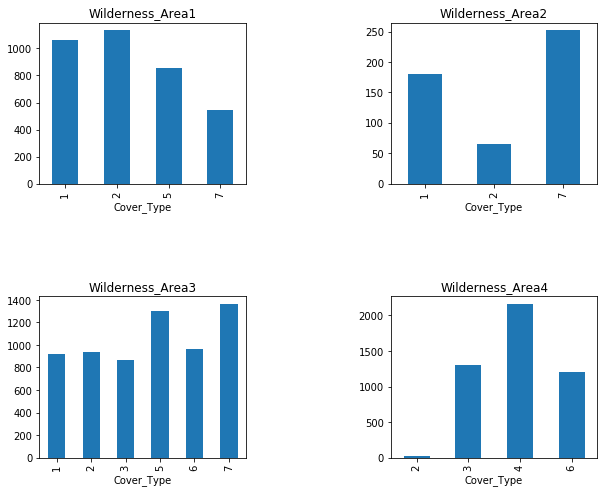

In [79]:
fig, ax = plt.subplots(nrows=2, ncols=2)
ax1, ax2, ax3, ax4 = ax.flatten()

fig.set_size_inches(10, 8)
fig.subplots_adjust(wspace=0.7, hspace=0.7)

wa1.plot(kind="bar", ax = ax1)
wa2.plot(kind="bar", ax = ax2)
wa3.plot(kind="bar", ax = ax3)
wa4.plot(kind="bar", ax = ax4)
ax1.set_title("Wilderness_Area1")
ax2.set_title("Wilderness_Area2")
ax3.set_title("Wilderness_Area3")
ax4.set_title("Wilderness_Area4")

In [80]:
forest_1 = X.loc[X['Wilderness_Area1'] == 1].copy()
# test_forest_1 = test_dr.loc[test_dr['Wilderness_Area1'] == 1].copy()
# y_forest_1 = y.iloc[WA1ind].copy()
forest_2 = X.loc[X['Wilderness_Area2'] == 1].copy()
# test_forest_2 = test_dr.loc[test_dr['Wilderness_Area2'] == 1].copy()
# y_forest_2 = y.iloc[WA2ind].copy()
forest_3 = X.loc[X['Wilderness_Area3'] == 1].copy()
# test_forest_3 = test_dr.loc[test_dr['Wilderness_Area3'] == 1].copy()
# y_forest_3 = y.iloc[WA3ind].copy()
forest_4 = X.loc[X['Wilderness_Area4'] == 1].copy()
# test_forest_4 = test_dr.loc[test_dr['Wilderness_Area4'] == 1].copy()
# y_forest_4 = y.iloc[WA4ind].copy()

In [81]:
forest_1.nunique()

Id                                    3597
Elevation                              905
Aspect                                 355
Slope                                   47
Horizontal_Distance_To_Hydrology       237
Vertical_Distance_To_Hydrology         305
Horizontal_Distance_To_Roadways       2109
Hillshade_9am                          132
Hillshade_Noon                         123
Hillshade_3pm                          219
Horizontal_Distance_To_Fire_Points    2020
Wilderness_Area1                         1
Wilderness_Area2                         1
Wilderness_Area3                         1
Wilderness_Area4                         1
Soil_Type1                               1
Soil_Type2                               1
Soil_Type3                               1
Soil_Type4                               1
Soil_Type5                               1
Soil_Type6                               1
Soil_Type7                               1
Soil_Type8                               2
Soil_Type9 

In [82]:
def feature_remover(sc_data):
    drop_list = []
    for ind in range(0, sc_data.shape[1]):
        if sc_data.iloc[:,ind].nunique() < 3:
            #print("Drop {}".format(sc_data.keys()[ind]))
            drop_list.append(ind)
    sc_data.drop(sc_data.keys()[drop_list], axis=1, inplace = True)
    return sc_data

In [83]:
all_forest_list = [forest_1, forest_2, forest_3, forest_4]
for fr in all_forest_list:
    fr = feature_remover(fr)
    print(fr.nunique())

Id                                    3597
Elevation                              905
Aspect                                 355
Slope                                   47
Horizontal_Distance_To_Hydrology       237
Vertical_Distance_To_Hydrology         305
Horizontal_Distance_To_Roadways       2109
Hillshade_9am                          132
Hillshade_Noon                         123
Hillshade_3pm                          219
Horizontal_Distance_To_Fire_Points    2020
Cover_Type                               4
dtype: int64
Id                                    499
Elevation                             313
Aspect                                246
Slope                                  35
Horizontal_Distance_To_Hydrology      168
Vertical_Distance_To_Hydrology        208
Horizontal_Distance_To_Roadways       385
Hillshade_9am                         110
Hillshade_Noon                         78
Hillshade_3pm                         148
Horizontal_Distance_To_Fire_Points    428
Cover_Typ

In [84]:
# test_forest_1.drop(["Id"], axis=1, inplace = True)
# test_forest_2.drop(["Id"], axis=1, inplace = True)
# test_forest_3.drop(["Id"], axis=1, inplace = True)
# test_forest_4.drop(["Id"], axis=1, inplace = True)

## Анализ взаимосвязей признаков

In [85]:
forest_1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3597 entries, 0 to 14591
Data columns (total 12 columns):
Id                                    3597 non-null int64
Elevation                             3597 non-null int64
Aspect                                3597 non-null int64
Slope                                 3597 non-null int64
Horizontal_Distance_To_Hydrology      3597 non-null int64
Vertical_Distance_To_Hydrology        3597 non-null int64
Horizontal_Distance_To_Roadways       3597 non-null int64
Hillshade_9am                         3597 non-null int64
Hillshade_Noon                        3597 non-null int64
Hillshade_3pm                         3597 non-null int64
Horizontal_Distance_To_Fire_Points    3597 non-null int64
Cover_Type                            3597 non-null int64
dtypes: int64(12)
memory usage: 365.3 KB


In [86]:
forest_1

,Id,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,Cover_Type
0,1,2596,51,3,258,0,510,221,232,148,6279,5
1,2,2590,56,2,212,-6,390,220,235,151,6225,5
2,3,2804,139,9,268,65,3180,234,238,135,6121,2
3,4,2785,155,18,242,118,3090,238,238,122,6211,2
4,5,2595,45,2,153,-1,391,220,234,150,6172,5
5,6,2579,132,6,300,-15,67,230,237,140,6031,2
6,7,2606,45,7,270,5,633,222,225,138,6256,5
7,8,2605,49,4,234,7,573,222,230,144,6228,5
8,9,2617,45,9,240,56,666,223,221,133,6244,5
9,10,2612,59,10,247,11,636,228,219,124,6230,5


In [87]:
forest_1.corr()

,Id,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,Cover_Type
Id,1.000000,0.270484,-0.007781,0.059479,-0.001005,0.034339,-0.109449,0.037006,-0.022760,-0.045352,-0.110815,0.083935
Elevation,0.270484,1.000000,0.121128,-0.133357,0.218084,0.088839,0.440339,-0.150300,0.188238,0.219503,-0.012084,0.078877
Aspect,-0.007781,0.121128,1.000000,-0.100408,0.023068,-0.000957,0.280974,-0.567605,0.365322,0.570685,0.030331,-0.126604
Slope,0.059479,-0.133357,-0.100408,1.000000,0.026074,0.317701,-0.384351,0.072865,-0.783764,-0.632238,-0.196070,0.229576
Horizontal_Distance_To_Hydrology,-0.001005,0.218084,0.023068,0.026074,1.000000,0.585652,0.123034,-0.035255,0.047722,0.045457,0.049661,-0.135377
Vertical_Distance_To_Hydrology,0.034339,0.088839,-0.000957,0.317701,0.585652,1.000000,-0.093935,-0.009155,-0.224552,-0.165610,-0.086201,0.059048
Horizontal_Distance_To_Roadways,-0.109449,0.440339,0.280974,-0.384351,0.123034,-0.093935,1.000000,-0.336077,0.432934,0.511154,0.271153,-0.260282
Hillshade_9am,0.037006,-0.150300,-0.567605,0.072865,-0.035255,-0.009155,-0.336077,1.000000,-0.172839,-0.744639,-0.099060,0.232027
Hillshade_Noon,-0.022760,0.188238,0.365322,-0.783764,0.047722,-0.224552,0.432934,-0.172839,1.000000,0.773781,0.149829,-0.220270
Hillshade_3pm,-0.045352,0.219503,0.570685,-0.632238,0.045457,-0.165610,0.511154,-0.744639,0.773781,1.000000,0.174331,-0.306557


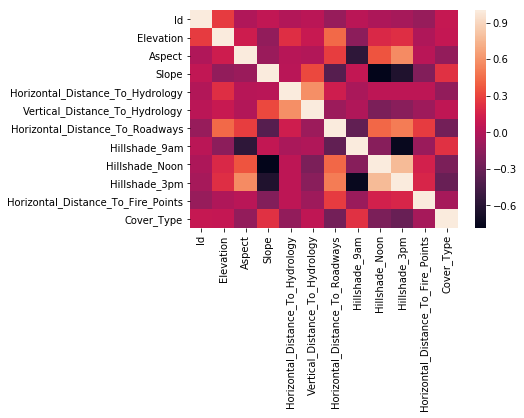

In [88]:
sns.heatmap(forest_1.corr())

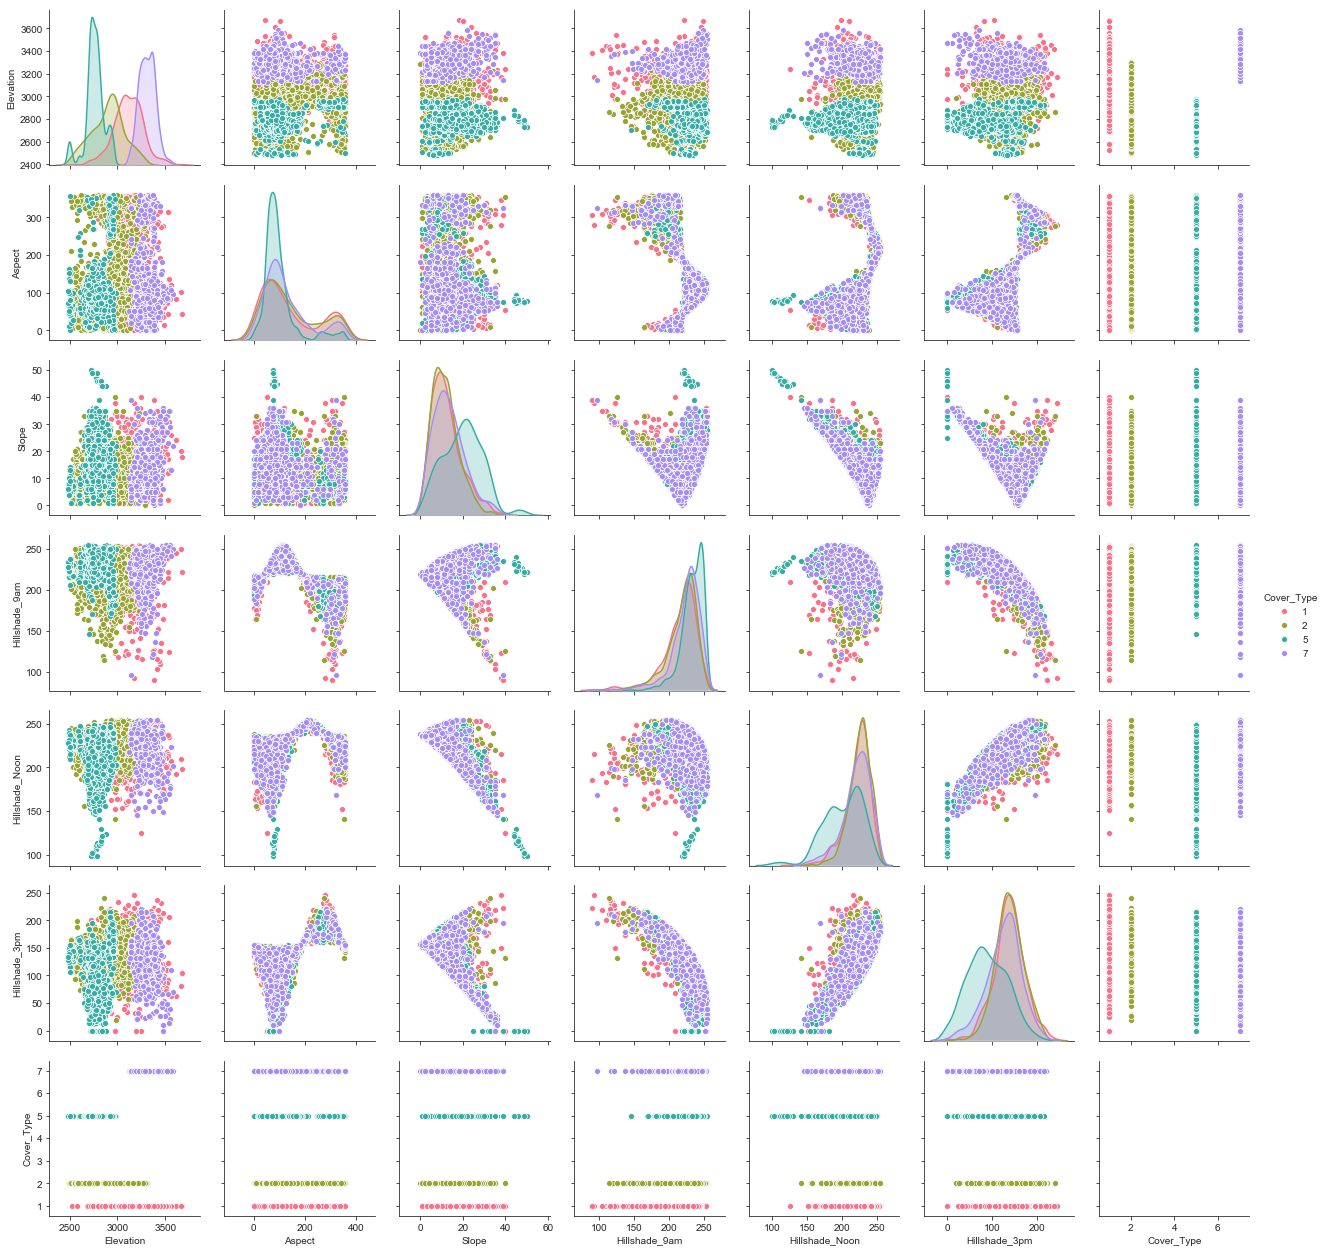

In [113]:
sns.set_style("ticks")
sns.pairplot(forest_1[["Elevation", "Aspect", "Slope", "Hillshade_9am", "Hillshade_Noon", "Hillshade_3pm", "Cover_Type"]],hue = 'Cover_Type',diag_kind = "kde",kind = "scatter",palette = "husl")
plt.show()

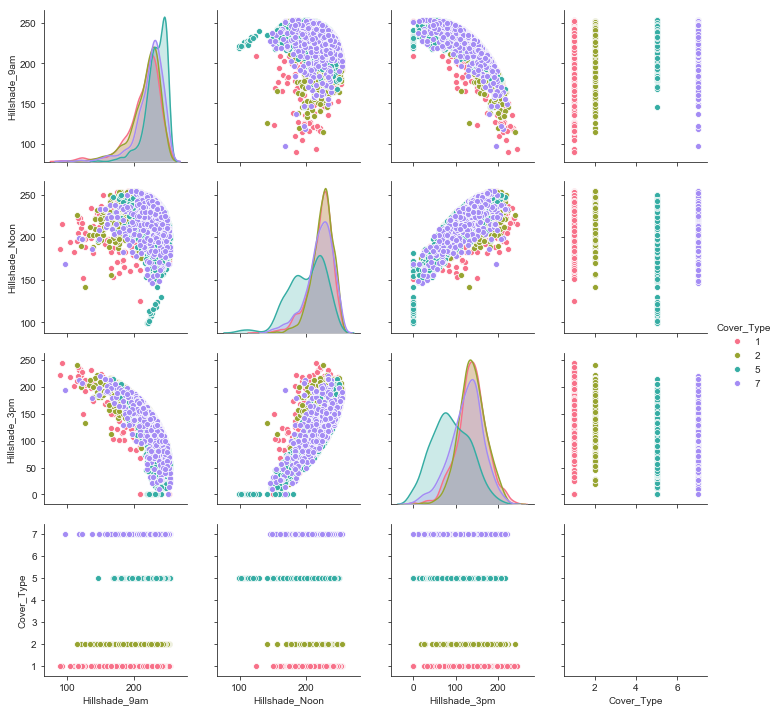

In [114]:
sns.set_style("ticks")
sns.pairplot(forest_1[["Hillshade_9am", "Hillshade_Noon", "Hillshade_3pm", "Cover_Type"]],hue = 'Cover_Type',diag_kind = "kde",kind = "scatter",palette = "husl")
plt.show()

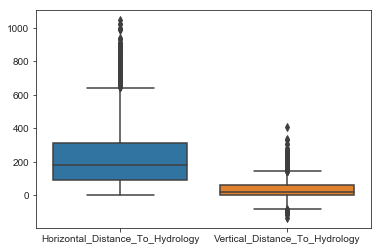

In [110]:
sns.boxplot(data=forest_1[["Horizontal_Distance_To_Hydrology", "Vertical_Distance_To_Hydrology"]], orient="v")

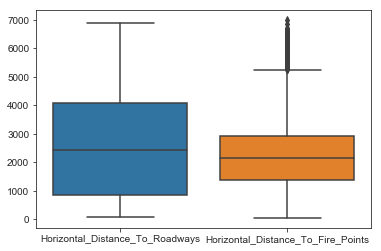

In [111]:
sns.boxplot(data=forest_1[["Horizontal_Distance_To_Roadways", "Horizontal_Distance_To_Fire_Points"]], orient="v")

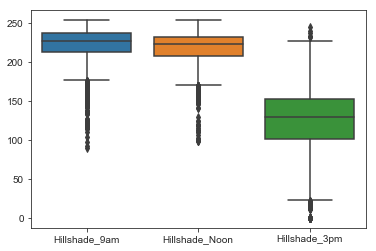

In [112]:
sns.boxplot(data=forest_1[["Hillshade_9am", "Hillshade_Noon", "Hillshade_3pm"]], orient="v")

In [89]:
forest_2.corr()

,Id,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,Cover_Type
Id,1.000000,0.101448,-0.058492,0.081920,-0.012244,0.117391,0.046721,-0.046912,-0.055696,0.009974,0.120490,0.055021
Elevation,0.101448,1.000000,-0.160299,0.085524,0.216650,0.344046,0.485863,-0.031456,-0.198072,-0.065779,-0.151740,0.756954
Aspect,-0.058492,-0.160299,1.000000,0.174088,-0.100049,-0.004627,-0.122092,-0.632124,0.165090,0.658852,-0.119557,-0.133490
Slope,0.081920,0.085524,0.174088,1.000000,-0.096519,0.180559,0.050511,-0.373250,-0.519993,-0.021906,0.097404,0.030639
Horizontal_Distance_To_Hydrology,-0.012244,0.216650,-0.100049,-0.096519,1.000000,0.526659,-0.214675,0.007924,0.038115,0.022564,-0.224831,0.028636
Vertical_Distance_To_Hydrology,0.117391,0.344046,-0.004627,0.180559,0.526659,1.000000,-0.052874,-0.209901,-0.149043,0.111763,-0.148855,0.136072
Horizontal_Distance_To_Roadways,0.046721,0.485863,-0.122092,0.050511,-0.214675,-0.052874,1.000000,0.056547,-0.174586,-0.131202,0.302724,0.314760
Hillshade_9am,-0.046912,-0.031456,-0.632124,-0.373250,0.007924,-0.209901,0.056547,1.000000,0.135264,-0.854640,0.099264,0.072117
Hillshade_Noon,-0.055696,-0.198072,0.165090,-0.519993,0.038115,-0.149043,-0.174586,0.135264,1.000000,0.379878,0.036203,-0.202069
Hillshade_3pm,0.009974,-0.065779,0.658852,-0.021906,0.022564,0.111763,-0.131202,-0.854640,0.379878,1.000000,-0.091847,-0.161579


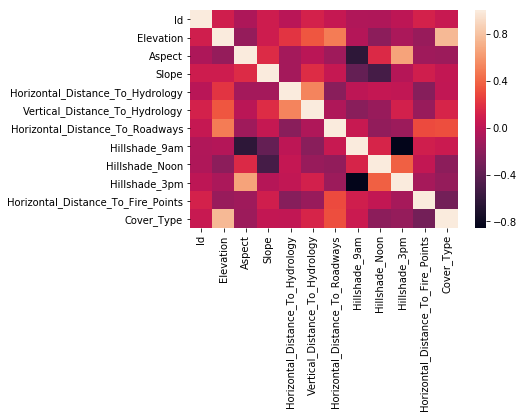

In [90]:
sns.heatmap(forest_2.corr())

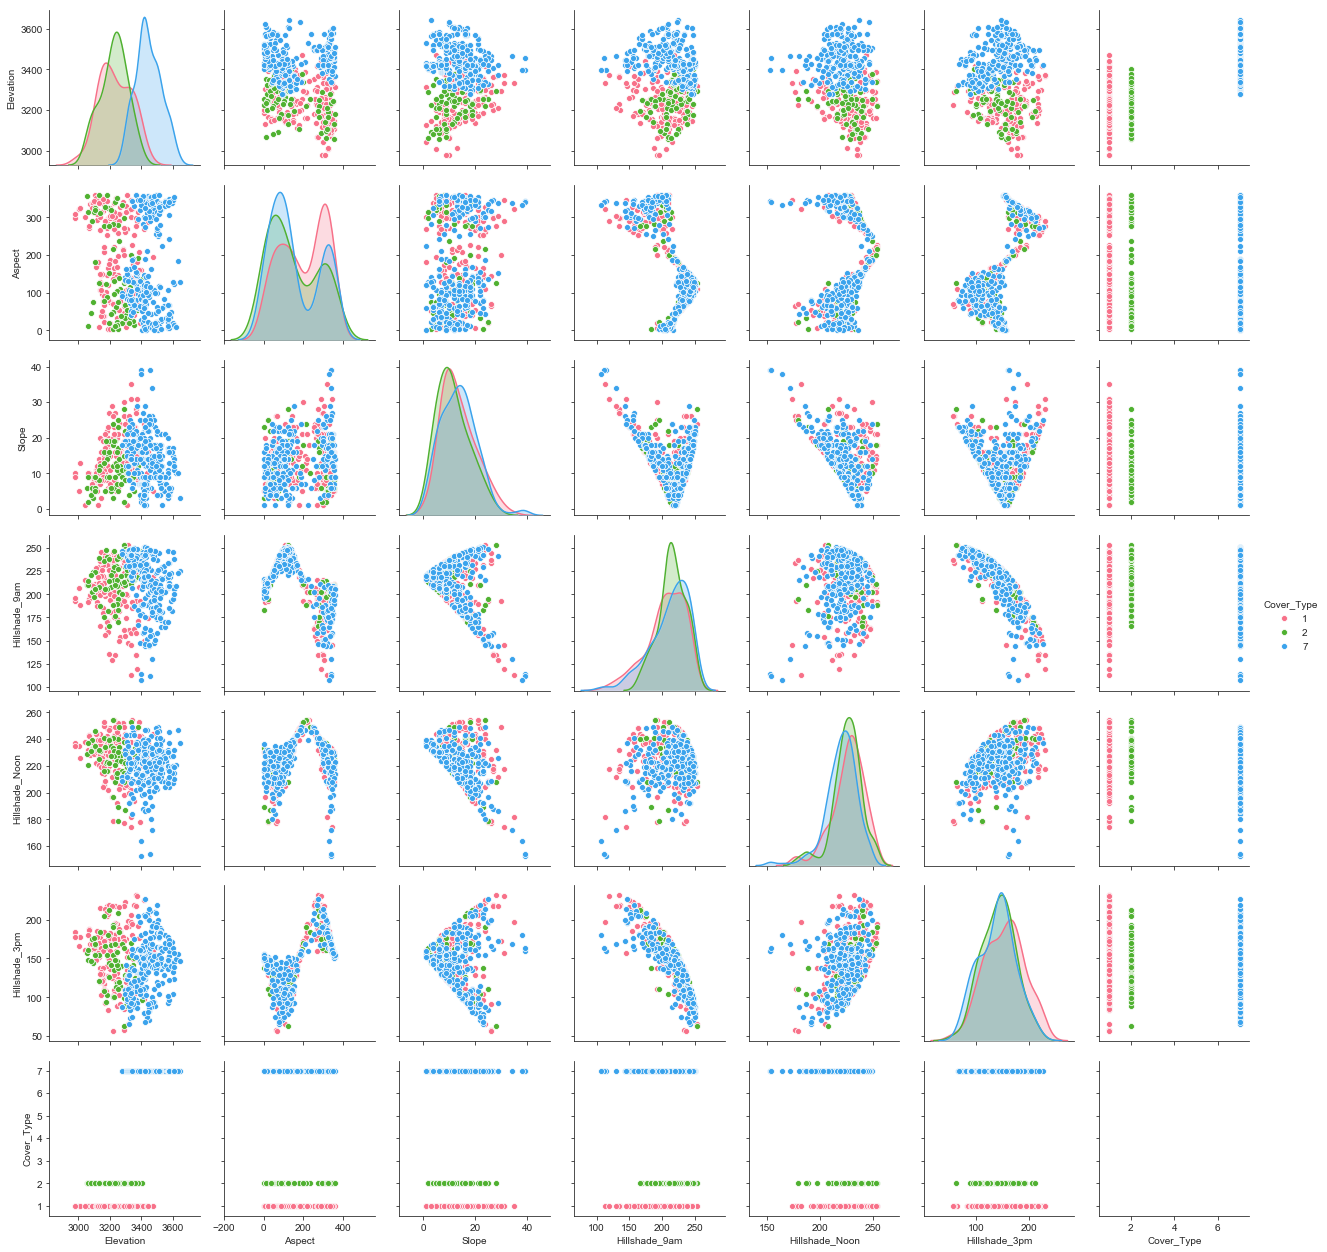

In [115]:
sns.set_style("ticks")
sns.pairplot(forest_2[["Elevation", "Aspect", "Slope", "Hillshade_9am", "Hillshade_Noon", "Hillshade_3pm", "Cover_Type"]],hue = 'Cover_Type',diag_kind = "kde",kind = "scatter",palette = "husl")
plt.show()

In [91]:
forest_3.corr()

,Id,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,Cover_Type
Id,1.000000,0.034652,-0.062829,0.045559,0.048760,0.024625,0.130805,0.082138,-0.029909,-0.091953,0.046685,-0.023124
Elevation,0.034652,1.000000,0.096568,-0.151458,0.449895,0.314538,0.603524,-0.002255,0.062470,0.062902,0.352971,0.165207
Aspect,-0.062829,0.096568,1.000000,0.032077,0.063310,0.056332,0.106733,-0.573501,0.374394,0.646469,0.036036,-0.004957
Slope,0.045559,-0.151458,0.032077,1.000000,-0.070378,0.208210,-0.045313,-0.212221,-0.440306,-0.238671,-0.112265,0.004434
Horizontal_Distance_To_Hydrology,0.048760,0.449895,0.063310,-0.070378,1.000000,0.695060,0.240755,-0.063062,0.047818,0.092700,0.199856,0.022462
Vertical_Distance_To_Hydrology,0.024625,0.314538,0.056332,0.208210,0.695060,1.000000,0.210061,-0.100474,-0.083108,0.003228,0.152866,0.075809
Horizontal_Distance_To_Roadways,0.130805,0.603524,0.106733,-0.045313,0.240755,0.210061,1.000000,-0.058210,0.050125,0.085320,0.475968,0.152535
Hillshade_9am,0.082138,-0.002255,-0.573501,-0.212221,-0.063062,-0.100474,-0.058210,1.000000,-0.042721,-0.791073,-0.049835,0.024541
Hillshade_Noon,-0.029909,0.062470,0.374394,-0.440306,0.047818,-0.083108,0.050125,-0.042721,1.000000,0.618035,0.026488,-0.090214
Hillshade_3pm,-0.091953,0.062902,0.646469,-0.238671,0.092700,0.003228,0.085320,-0.791073,0.618035,1.000000,0.079705,-0.066189


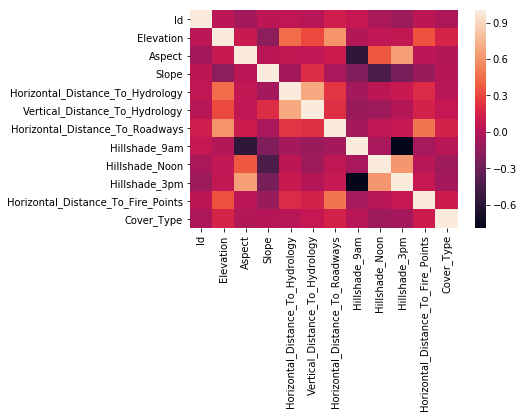

In [92]:
sns.heatmap(forest_3.corr())

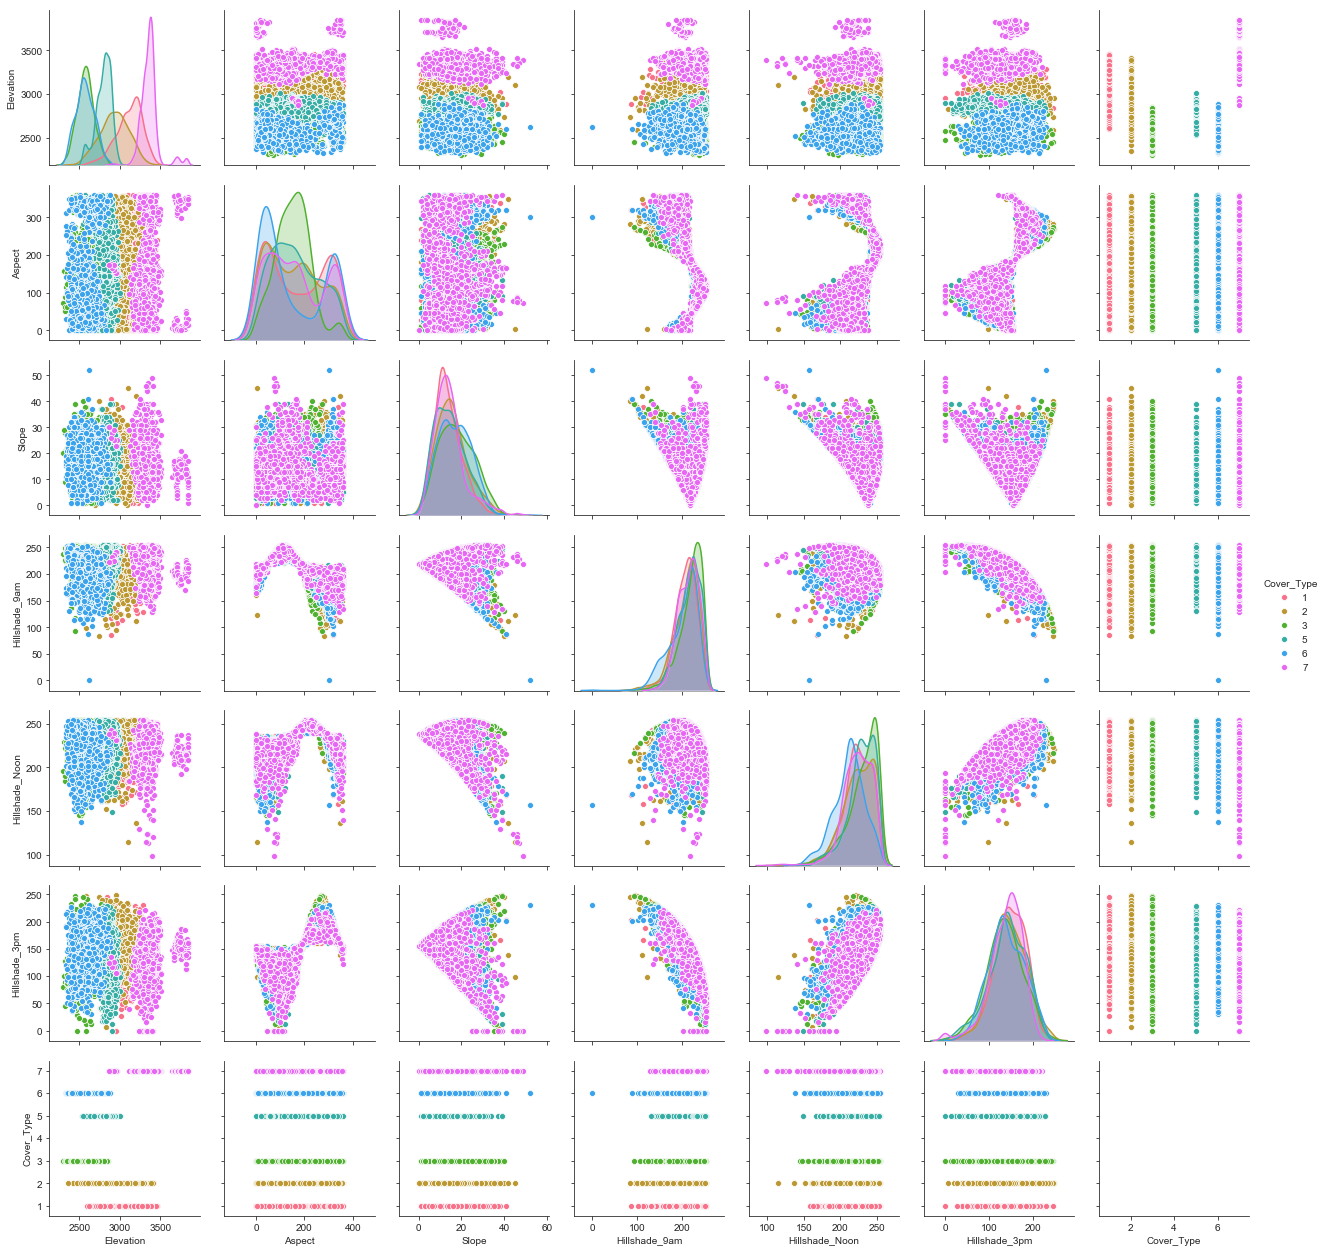

In [116]:
sns.set_style("ticks")
sns.pairplot(forest_3[["Elevation", "Aspect", "Slope", "Hillshade_9am", "Hillshade_Noon", "Hillshade_3pm", "Cover_Type"]],hue = 'Cover_Type',diag_kind = "kde",kind = "scatter",palette = "husl")
plt.show()

In [93]:
forest_4.corr()

,Id,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,Cover_Type
Id,1.000000,0.202575,0.011184,-0.078022,-0.028826,-0.033759,0.046593,0.019775,0.049878,0.023595,0.130486,0.066055
Elevation,0.202575,1.000000,0.056335,-0.192311,0.388254,0.258481,0.145532,0.015360,0.188405,0.114768,0.320525,0.096459
Aspect,0.011184,0.056335,1.000000,0.017148,0.068103,0.053201,0.102360,-0.617127,0.308562,0.668364,-0.031462,0.094491
Slope,-0.078022,-0.192311,0.017148,1.000000,0.168646,0.327201,-0.111704,-0.216227,-0.640366,-0.283102,-0.116003,-0.032632
Horizontal_Distance_To_Hydrology,-0.028826,0.388254,0.068103,0.168646,1.000000,0.772814,-0.024828,-0.077393,-0.046953,0.018759,0.090902,0.014279
Vertical_Distance_To_Hydrology,-0.033759,0.258481,0.053201,0.327201,0.772814,1.000000,-0.025044,-0.076236,-0.178670,-0.073818,0.045900,-0.057451
Horizontal_Distance_To_Roadways,0.046593,0.145532,0.102360,-0.111704,-0.024828,-0.025044,1.000000,0.016150,0.215004,0.107028,-0.037604,0.097267
Hillshade_9am,0.019775,0.015360,-0.617127,-0.216227,-0.077393,-0.076236,0.016150,1.000000,0.027583,-0.812100,0.097344,-0.128490
Hillshade_Noon,0.049878,0.188405,0.308562,-0.640366,-0.046953,-0.178670,0.215004,0.027583,1.000000,0.538992,0.087540,-0.024820
Hillshade_3pm,0.023595,0.114768,0.668364,-0.283102,0.018759,-0.073818,0.107028,-0.812100,0.538992,1.000000,-0.018289,0.114174


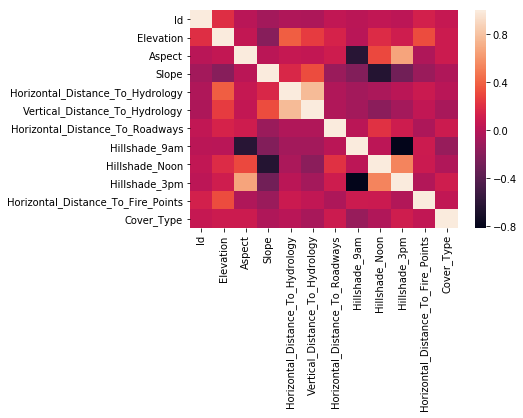

In [94]:
sns.heatmap(forest_4.corr())

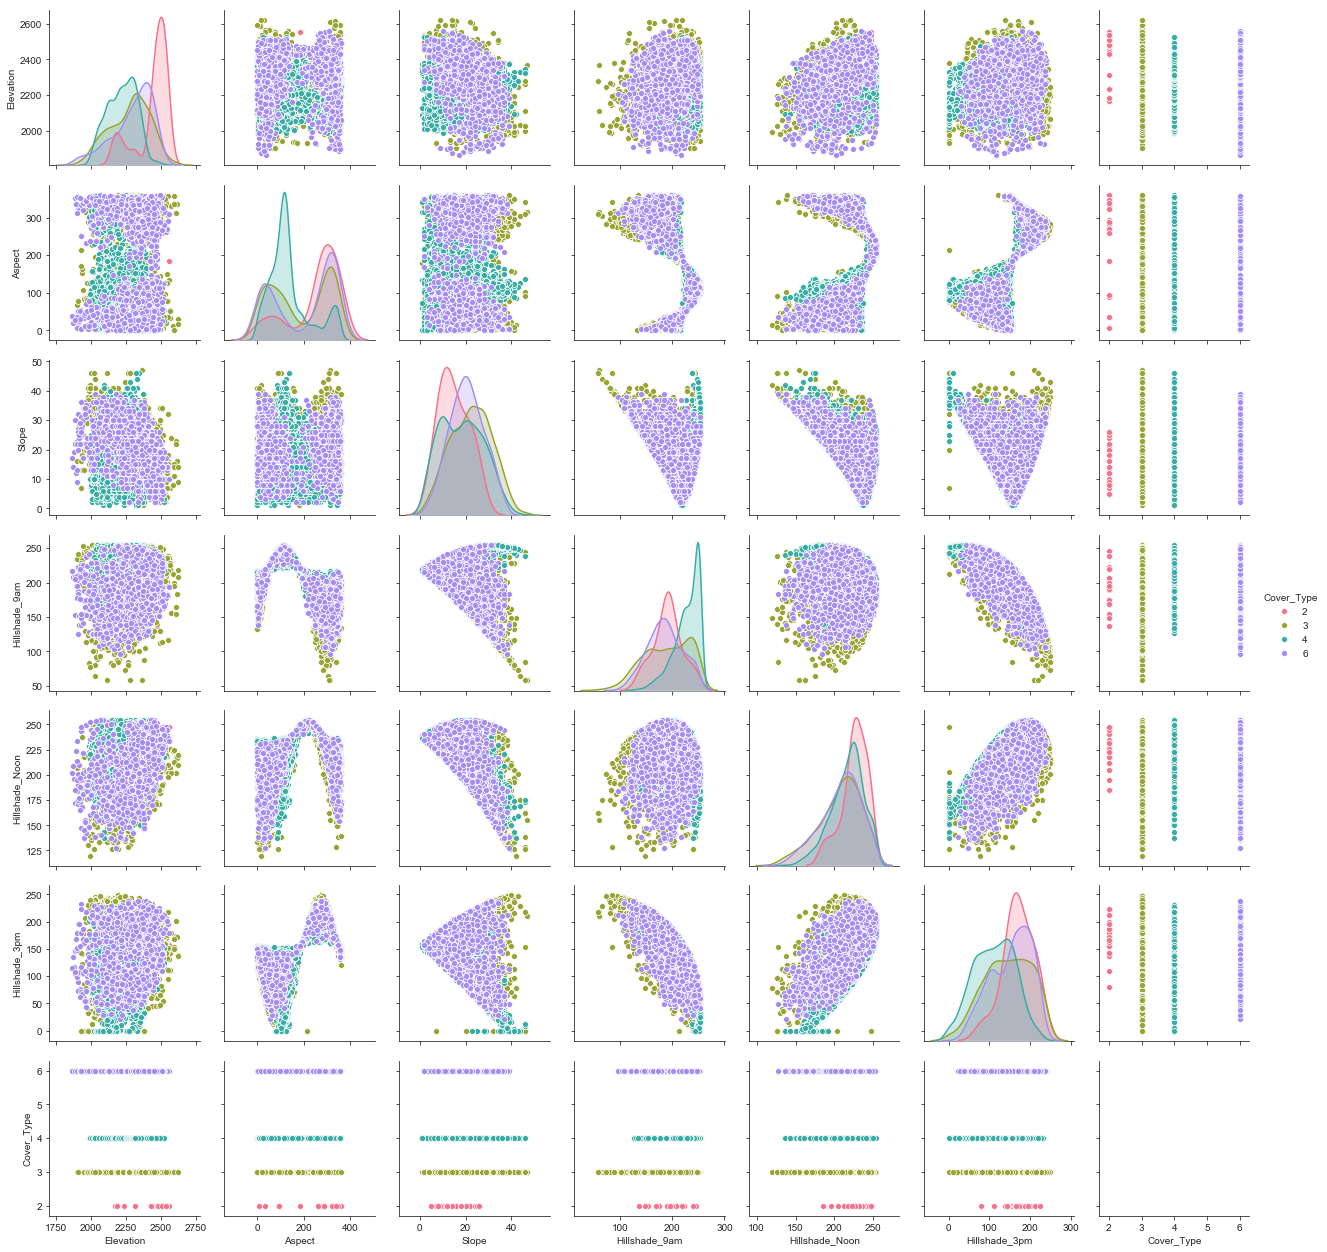

In [117]:
sns.set_style("ticks")
sns.pairplot(forest_4[["Elevation", "Aspect", "Slope", "Hillshade_9am", "Hillshade_Noon", "Hillshade_3pm", "Cover_Type"]],hue = 'Cover_Type',diag_kind = "kde",kind = "scatter",palette = "husl")
plt.show()

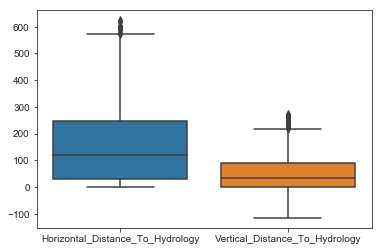

In [107]:
sns.boxplot(data=forest_4[["Horizontal_Distance_To_Hydrology", "Vertical_Distance_To_Hydrology"]], orient="v")